## $\huge INTRODUCTION $

<font size='3'> In this project, we will explore the **"sensor-data.csv" dataset**, which contains **signal variable data collected from sensors in a semiconductor manufacturing process**. The **dataset consists** of <marK>**1567**</mark> examples with <mark>**591**</mark> features, where each example represents a single production entity with associated measured features and a **label indicating pass/fail yield for in-house line testing** Our objective is to build a classifier to **predict the Pass/Fail** yield of a particular process entity and analyze whether all **591 features** are necessary to build the model. We will perform exploratory data analysis, test different classification algorithms, and evaluate their performance to determine the most effective approach. Additionally, we will visualize the data to identify essential signals impacting the yield type.</font>

1. **INTRODUCTION**

2. **USED LIBRARIES**

3. **DATA EXPLORATION**

    **3.1. Detailed Information of the Dataset**

    **3.2. Exploratory Data Analysis**

    **3.3. Explore problems within variables**

    **3.4. Various Visualizations from Dataset**

4. **DATA PER-PROCESSING**   
    
    **4.1. Segregate predictors vs target attributes**

    **4.2. Check for target balancing and fix if imbalanced (using SMOTE)**

    **4.3. Perform train-test split and standardize data**
    
    **4.4. Check if train and test data have similar statistical characteristics**


5. **MODEL DEVELOPMENT**
    
   **5.1 Training and Testing**
    
     - **Train supervised learning models**

     - **Test models for accuracy**


   **5.2. Model Optimization**

      - **Use techniques to improve model performance**

      - **Supervised learning optimization**


   **5.3. Hyperparameter Tuning**

      - **Perform hyperparameter tuning using GridSearchCV**

      - **Use cross-validation to evaluate model performance**




   **5.4. Data Preprocessing**

      - **Apply techniques to improve model performance**

      - **Dimensionality reduction**

      - **Attribute removal**

      - **Standardization/normalization**

      - **Target balancing**



6. **Evaluating Models**

    **6.1. Model Performance Reports**

    - **Generate classification reports for**

      - **Naive Bayes**

      - **Random Forest**

      - **SVM models**


    **6.2. Model Comparison:**

      - **Compare models based on train and test accuracies**


    **6.3. Model Selection**

      - **Compare performance of all models**


    **6.4. Selecting the Best Model**

      - **Select the best model based on performance**


    **6.5. Visualizing the Best Model**

      - **Visualize the final best-trained model**


    **6.5. Model Evaluation**

      - **Evaluate the selected model's performance**



7.  **CONCLUSION**

## <font size="5">2.Importing LIBRARIES</font>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from numpy import isnan
from pandas import isnull
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### <font size='5'> 3.1. Detailed Information of the Dataset</font>

<font size='3'>Here we will import the dataset first. Then, we will explain the columns(features) of the dataset one by one.</font>

<font size='3'> Import dataset  #Read **csv file** in **signal-data.csv** and load into 'data variable'</font>

In [24]:
import pandas as pd
data=pd.read_csv('signal-data.csv')
df=pd.DataFrame(data)

### <font size='5'>3.2. Exploratory Data Analysis</font>

<font size='3'>Now , we will explore the data in singal-data.csv to gain insights about the data.</font>


In [31]:
df.shape # view dimensions of dataset

(1567, 592)

<font size='3'>We can see that there are **(1567)** instances and **(592)** attributes in the data set.</font>

### View top 10 rows of signal-data.csv in dataset 

In [35]:
df.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


### View last 10 rows of signal-data.csv in dataset 

In [42]:
df.tail(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1557,2008-10-16 05:08:00,3072.10,2534.87,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.4359,...,26.7330,0.5010,0.0132,0.0035,2.6249,0.0277,0.0074,0.0023,26.7330,-1
1558,2008-10-16 05:13:00,3012.30,2466.84,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3832,...,176.6783,0.4993,0.0130,0.0037,2.5976,0.0097,0.0172,0.0054,176.6783,-1
1559,2008-10-16 05:44:00,3076.33,2456.13,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3120,...,117.4564,0.4960,0.0157,0.0036,3.1743,0.0150,0.0176,0.0057,117.4564,-1
1560,2008-10-16 05:58:00,2770.40,2549.42,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.2811,...,127.3154,0.5009,0.0155,0.0036,3.0997,0.0105,0.0133,0.0042,127.3154,-1
1561,2008-10-16 15:02:00,2951.14,2326.59,2212.6334,1081.5662,1.0096,100.0,113.4278,0.1253,1.4492,...,46.4573,0.4965,0.0118,0.0032,2.3817,0.0320,0.0148,0.0051,46.4573,-1
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


## View summary of dataset in signal-data


In [86]:
df.info() # Show detailed information for dataset columns(attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


<font size='3'> Now, we can see our dataset with multiple columns, including:</font>

- <font size='3'> **Time**: a sequence of numbers from 0 to 589</font>

- <font size='3'> **Pass/Fail**: a column with values of -1 or 1</font>

- <font size='3'> **Date and Time**: a column with dates and times in the format "YYYY-MM-DD HH:MM:SS"</font>

- <font size='3'> **Multiple feature columns with numerical values** (e.g., 3030.93, 2564.00, etc.)</font>

<font size='3'> **our target column is "Pass/Fail"** with values **-1 for pass and 1 for fail**. **This is a binary classification problem**, where you want to **predict whether a sample will pass or fail** based on the other feature columns.

## <font size='3'> Let's see the various statistics about the numeric data.</font>

In [103]:
round(df.describe(include='all'),1)
#round(df.describe(),1)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.0,1560.0,1553.0,1553.0,1553.0,1553.0,1553.0,1558.0,1565.0,...,618.0,1566.0,1566.0,1566.0,1566.0,1566.0,1566.0,1566.0,1566.0,1567.0
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.5,2495.9,2200.5,1396.4,4.2,100.0,101.1,0.1,1.5,...,97.9,0.5,0.0,0.0,3.1,0.0,0.0,0.0,99.7,-0.9
std,NaN,73.6,80.4,29.5,441.7,56.4,0.0,6.2,0.0,0.1,...,87.5,0.0,0.0,0.0,3.6,0.0,0.0,0.0,93.9,0.5
min,NaN,2743.2,2158.8,2060.7,0.0,0.7,100.0,82.1,0.0,1.2,...,0.0,0.5,0.0,0.0,1.2,-0.0,0.0,0.0,0.0,-1.0
25%,NaN,2966.3,2452.2,2181.0,1081.9,1.0,100.0,97.9,0.1,1.4,...,46.2,0.5,0.0,0.0,2.3,0.0,0.0,0.0,44.4,-1.0
50%,NaN,3011.5,2499.4,2201.1,1285.2,1.3,100.0,101.5,0.1,1.5,...,72.3,0.5,0.0,0.0,2.8,0.0,0.0,0.0,71.9,-1.0
75%,NaN,3056.6,2538.8,2218.1,1591.2,1.5,100.0,104.6,0.1,1.5,...,116.5,0.5,0.0,0.0,3.3,0.0,0.0,0.0,114.7,-1.0


## Check data types of columns of dataframe in signal dataset


In [68]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

<font size='3'>Now, we can see that all the columns of the dataframe are of type numeric.</font>

 <font size='3'>Summary of variables:</font>
 
 **-->** <font size='3'> Our dataset has a <code>**total of 592 variables**.</code> in the dataset.</font>
 
 **-->** <font size='3'> Out of these, </code>**591 are numerical variables**</code>, which means they contain **continuous values like numbers**. .</font>

  **-->** <font size='3'> The **remaining 1 variable**, <code> **"Pass/Fail"**, is a categorical variable,</code> which means it contains **discrete values like labels or categories**.</code></font>




In [70]:
# Print the data shape (number of rows and columns)
print(df.shape)


(1567, 592)


In [72]:
# Print the data columns
print(df.columns)

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


## 3.3. Explore problems within variables


<font size='3'>Now, we will explore problems within variables. Missing values in variables.</font>

In [116]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


<font size='3'>Our data has many columns with **missing values (NaN)**. This means that some information is missing in those columns.</font>

-  <font size='3'>Many columns have **NaN values**, which means some data is missing.</font>

- <font size='3'>We need to decide how to handle these missing values to analyze the data correctly.</font>


In [107]:
print(df.isna().sum())

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


- <font size='3'>  We have <code>some missing values</code> in our data, **but not in the 'Time' and 'Pass/Fail' columns**.</font>

- <font size='3'>  Only <code>some missing values are shown</code> because the **dataset is too big**.</font>


## 3.4. Data cleaning

In [20]:
import pandas as pd
df = pd.read_csv('signal-data.csv')
data_df = pd.DataFrame(df)

data_df = data_df.fillna(value='0')
print(data_df)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93   2564.0  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72   2479.9  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667    1326.52  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78     2206.3  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     58

- <font size='3'><code>Replace missing values with **0**</code>.</font>

In [22]:
print(data_df.isna().sum())

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64


- <font size='3'> Now,we can see no more blanks! **All missing values are now 0**.</font>

In [138]:
import pandas as pd
df = pd.read_csv('signal-data.csv')
data_df = pd.DataFrame(df)
data_df['Time'].duplicated().sum()

33

In [24]:
data_df.duplicated().sum()

0

- <font size='3'>No duplicates found!</font>

- <font size='3'>All data is unique!</font>

## Removing Unused Columns

In [170]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df=pd.DataFrame(df_Newdata)
print(df.head())


                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...    0.0000  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...    0.0000  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P


- <font size='3'>**Non-numeric columns have been converted to numeric**.</font>

- <font size='3'>**Columns with all 0 values have been removed**.</font>

- <font size='3'>**The original 'Time' column has been replaced with a new 'Time' column**.</font>

- <font size='3'>The data has been reorganized into a **new dataframe with 480 columns and 5 rows** (shown in the output).</font>

In [9]:
df.shape 

(1567, 480)

In [30]:
df['Time'].describe()

count                    1567
unique                   1534
top       2008-10-15 01:52:00
freq                        3
Name: Time, dtype: object

## 3.4. Data Analysis : Univariate, Bivariate, and Multivariate

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Univariate Analysis
print(df['Pass/Fail'].describe())


count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64


In [193]:
print(df['Time'].describe())

count                    1567
unique                   1534
top       2008-10-15 01:52:00
freq                        3
Name: Time, dtype: object


In [188]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df=pd.DataFrame(df_Newdata)
#print(df.head())
# Convert 'Time' column to numeric representation
df['Time'] = pd.to_datetime(df['Time']).astype('int64') // 10**9

# Bivariate analysis
correlation = df.corr()
correlation['Pass/Fail'].sort_values(ascending=False)

Pass/Fail    1.000000
59           0.156108
103          0.149140
348          0.134289
510          0.131907
               ...   
180         -0.076865
316         -0.087455
22          -0.089083
26          -0.097595
28          -0.123051
Name: Pass/Fail, Length: 480, dtype: float64

In [199]:
import pandas as pd
data=pd.read_csv('signal-data.csv')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Correlation analysis
correlation = data[['Time', 'Pass/Fail']].corr()
print("Correlation between Time and Pass/Fail:")
print(correlation)


Correlation between Time and Pass/Fail:
               Time  Pass/Fail
Time       1.000000  -0.020068
Pass/Fail -0.020068   1.000000


In [197]:
import pandas as pd
data=pd.read_csv('signal-data.csv')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Group analysis: Average Time for Pass and Fail
average_time = data.groupby('Pass/Fail')['Time'].mean()
print("Average Time for each Pass/Fail category:")
print(average_time)




Average Time for each Pass/Fail category:
Pass/Fail
-1   2008-07-31 08:10:23.581681408
 1   2008-07-24 18:55:31.730769408
Name: Time, dtype: datetime64[ns]


In [6]:
print(df['Pass/Fail'].value_counts())

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [201]:
from sklearn.decomposition import PCA
# Multivariate analysis
pca = PCA(n_components=2)
#df_pca = pca.fit_transform(df)
pca_data = pca.fit_transform(df.select_dtypes(exclude=['object']))

pca_data


array([[-5180.53631192, -3010.70481628],
       [-1862.68746933, -4017.31843828],
       [-3158.23168946, -3444.64747322],
       ...,
       [-3817.86972496,  -148.07959274],
       [-4192.34953914, -1377.40036942],
       [-3553.23413057, -3730.90495846]])

In [203]:
from sklearn.decomposition import PCA

# Perform PCA on your dataset
pca = PCA(n_components=2)  # Select the number of components (features) to retain
pca_data = pca.fit_transform(df.select_dtypes(exclude=['object']))

#pca_data = pca.fit_transform(df)

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)


[0.5739377  0.23371987]


- <font size='3'>The first principal component **(PC1)** explains approximately **57.39% of the variance in the data**, while the second principal component 
 **(PC2)** explains approximately **23.37% of the variance**.</font>

- <font size='3'> Together, these **two components** explain a total of approximately **80.76% (57.39 + 23.37) of the variance in the data**.</font>

- <font size='3'>This suggests that the first two principal components capture a significant portion of the information in the data, and can be **useful for dimensionality reduction, visualization, and other purposes**.</font>

## 3.5. Data Visualization : Univariate, Bivariate, and Multivariate

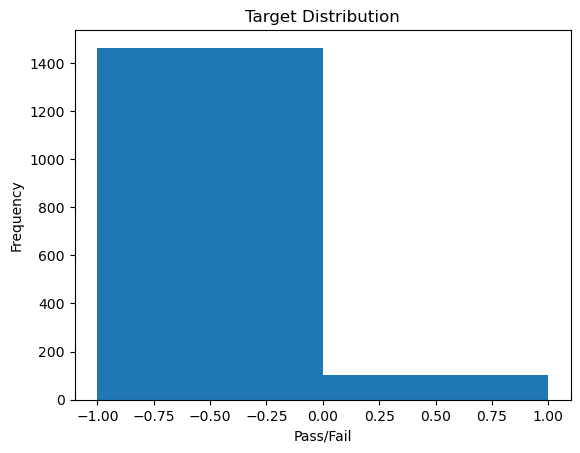

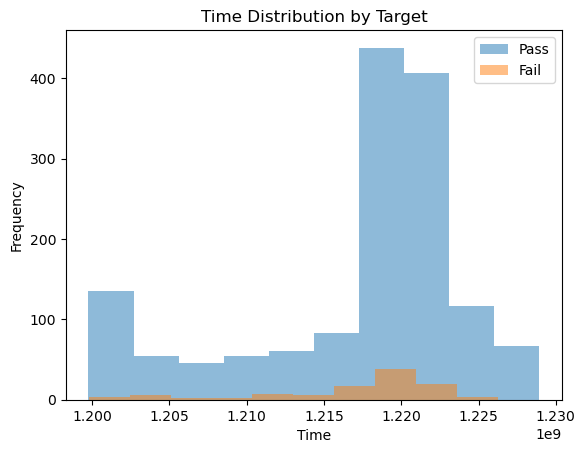

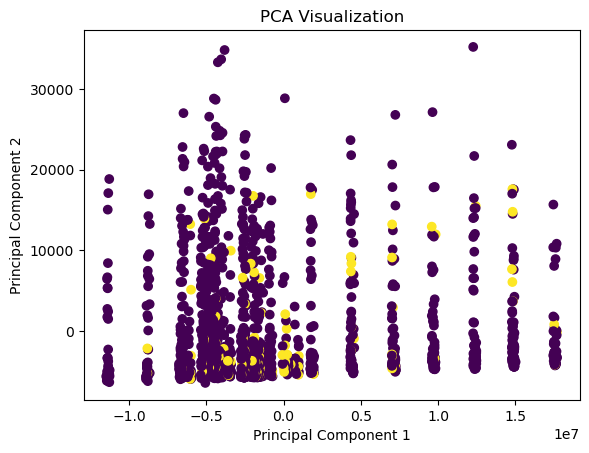

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to numeric representation
#df['Time'] = pd.to_datetime(df['Time']).dt.timestamp()
df['Time'] = pd.to_datetime(df['Time']).astype('int64') // 10**9


# Assume 'Target' column is the last column
Pass_Fail = df.iloc[:, -1]
#Assume 'Time' column is the first column
#time_column = df.iloc[:, 0]

# Visualize the target column
plt.hist(Pass_Fail, bins=2)
plt.title('Target Distribution')
plt.xlabel('Pass/Fail')
plt.ylabel('Frequency')
plt.show()

# Split the data into pass and fail categories
passed_samples = df[Pass_Fail == -1]
failed_samples = df[Pass_Fail == 1]

# Visualize the pass and fail data
plt.hist(passed_samples['Time'], alpha=0.5, label='Pass')
plt.hist(failed_samples['Time'], alpha=0.5, label='Fail')
plt.title('Time Distribution by Target')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Perform PCA on your dataset
pca = PCA(n_components=2)  # Select the number of components (features) to retain
#pca_data = pca.fit_transform(df)
pca_data = pca.fit_transform(df.select_dtypes(exclude=['object']))


# Print the explained variance ratio for each component
pca.explained_variance_ratio_

# Visualize the PCA results using a scatter plot
#pca_data[:, 0] #The x-axis represents the first principal component (PC1)
#pca_data[:, 1] #The y-axis represents the second principal component (PC2)
#c=df['Pass/Fail'] #The color of each point represents the value in the 'Pass/Fail' column
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Pass/Fail'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()




- <font size='3'>This is the first principal component **(PC1) of the transformed data**. It's the x-coordinate for each point in the scatter plot.</font>
- <font size='3'>This is the second principal component **(PC2) of the transformed data**. It's the y-coordinate for each point in the scatter plot.</font>.
- <font size='3'>This specifies the color of each point in the scatter plot based on the values in the 'Pass/Fail' column of the original data frame (df). Points with the same value in **'Pass/Fail' will have the same color**.</font>r.

## pie chart visualization

- <font size='3'> **Proportion of Passing and Failing Instances**</font>

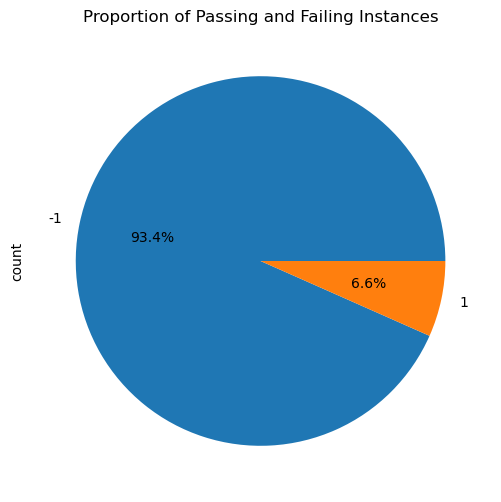

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Pie Chart
plt.figure(figsize=(8, 6))
df['Pass/Fail'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Passing and Failing Instances')
plt.show()



## Grouped Bar Chart visualization

- <font size='3'>**Passing and Failing Rates**</font>

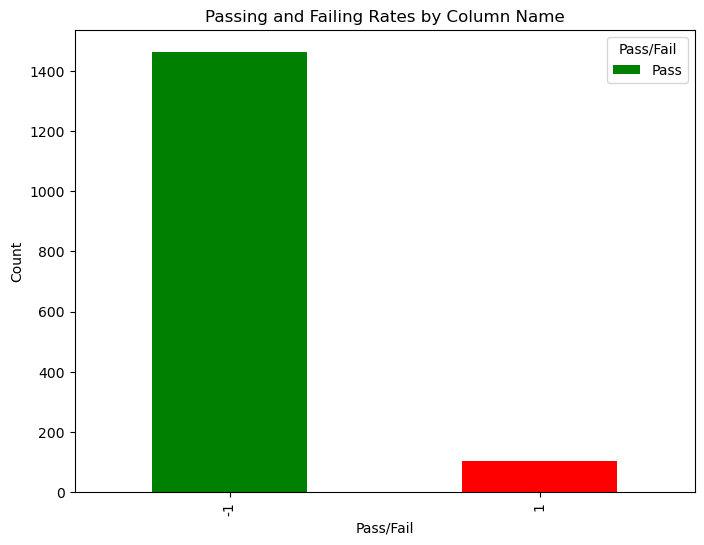

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Grouped Bar Chart
plt.figure(figsize=(8, 6))
df.groupby('Pass/Fail').size().plot(kind='bar',color=['green', 'red'])
plt.title('Passing and Failing Rates by Column Name')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.legend(title='Pass/Fail', labels=['Pass', 'Fail'])
plt.show()

## 4. DATA PER-PROCESSING    

## 4.1. Segregate predictors vs target attributes


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)  # Predictors
y = df['Pass/Fail']  # Target attribute

print(y.value_counts())


Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


- <font size='3'> Our dataset is **unbalanced**, with **1463 negative class(pass) (-1) and 104 positive class (1)(fail)**.</font>

- <font size='3'> This imbalance can cause machine learning algorithms to favor the negative class.</font>

- <font size='3'> To fix this, we can use **SMOTE (Synthetic Minority Over-sampling Technique)**.</font>

- <font size='3'> **SMOTE creates new positive class to balance out the data**.</font>

## 4.2. Check for target balancing and fix if imbalanced (using SMOTE)

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


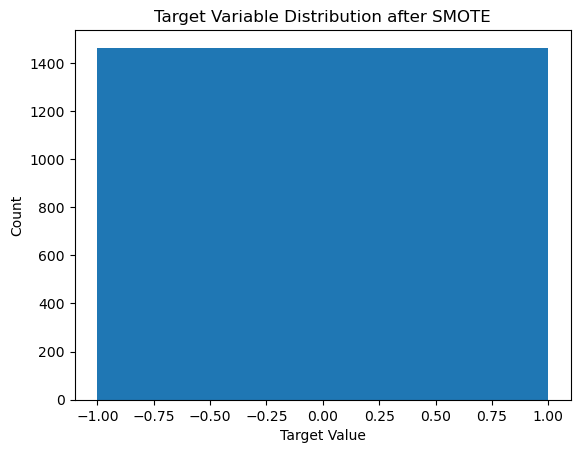

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)  # Predictors
y = df['Pass/Fail']  # Target attribute

#print(y.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
print(y_res.value_counts())

# Plot the distribution of the target variable after SMOTE
plt.hist(y_res, bins=2)
plt.title('Target Variable Distribution after SMOTE')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

## 4.3. Perform train-test split and standardize data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)  # Predictors
y = df['Pass/Fail']  # Target attribute

#print(y.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Data summary
print(X_train.describe())
print(y_train.describe())



               Time            0            1            2            3  \
count  2.340000e+03  2340.000000  2340.000000  2340.000000  2340.000000   
mean   1.217346e+09  3004.061603  2485.860209  2187.489649  1374.779024   
std    6.444555e+06   169.339184   149.144720   172.121600   398.350042   
min    1.199772e+09     0.000000     0.000000     0.000000     0.000000   
25%    1.215757e+09  2959.383274  2455.263954  2180.555600  1091.195201   
50%    1.219257e+09  3002.846487  2496.314349  2199.154669  1306.555268   
75%    1.221797e+09  3051.230000  2534.958331  2217.000000  1557.426576   
max    1.228935e+09  3356.350000  2846.440000  2315.266700  3715.041700   

                 4            5            6            7            8  ...  \
count  2340.000000  2340.000000  2340.000000  2340.000000  2340.000000  ...   
mean      2.737415    99.401709   100.698239     0.121507     1.465888  ...   
std      39.786866     7.713400     9.494801     0.010248     0.070811  ...   
min     

<font size='3'>The output shows statistics for each attribute and the target (Pass/Fail).</font>


- <font size='3'>Count: 2340 (total number of data points)</font>

- <font size='3'>**Mean: 0.011111** **(close to 0, indicating balance)** </font>

- <font size='3'>**Standard deviation: 1.000152 (measures spread)** </font>

- <font size='3'>Minimum and 25th percentile: -1 ( lowest value)</font>

- <font size='3'>Median and 75th percentile: 1 (middle and highest values)</font>

- <font size='3'>Maximum: 1 (highest value)</font>


<font size='3'>This means the target attribute **(Pass/Fail)** has two values: **-1 and 1**. The **data is balanced** since the **mean is close to 0**."</font>


## 4.4. Check if train and test data have similar statistical characteristics

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)  # Predictors
y = df['Pass/Fail']  # Target attribute

#print(y.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
#print(X_train_scaled_df.describe())
# Display a shorter summary of the scaled data
print(X_train_scaled_df.describe().head())

                0             1             2             3             4    \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean   2.628477e-14  3.127603e-16  7.135792e-17  5.256953e-16  2.034460e-16   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -2.660788e+00 -1.770943e+01 -1.406615e+01 -1.271857e+01 -3.455383e+00   
25%   -2.342675e-01 -2.621054e-01 -1.420101e-01 -3.826159e-02 -6.883619e-01   

                5             6             7             8             9    \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean  -3.795634e-18  6.429804e-16 -1.380852e-15 -4.122059e-16 -2.672127e-16   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -6.879135e-02 -1.288964e+01 -1.066389e+01 -1.186808e+01 -2.067481e+01   
25%   -4.186620e-02  7.758168e-02 -1.957856e-01 -3.344210e-02 -5.884058e-01   

       ...           469           470           4

## 5. MODEL DEVELOPMENT

## 5.1 Training and Testing


In [83]:
# Check the data preprocessing steps
print(X.shape)
print(y.shape)

# Apply SMOTE
X_res, y_res = smote.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

# Ensure they have the same number of samples
assert X_train.shape[0] == y_train.shape[0]

# Train Random Forest Classifier model on reduced data
rfc = RandomForestClassifier(**grid_search.best_params_)
rfc.fit(X_train, y_train)

(1567, 479)
(1567,)
(2926, 479)
(2926,)
(2340, 479)
(2340,)


RandomForestClassifier(n_estimators=200)

- ## Train supervised learning models

## Test models for accuracy

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)  # Predictors
y = df['Pass/Fail']  # Target attribute

#print(y.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9880546075085325


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import os

# Set the number of cores to use
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardization/normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_train_scaled)
X_test_selected = pca.transform(X_test_scaled)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_reduced, y_train)
y_pred_svm = svm_model.predict(X_test_selected)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_reduced, y_train)
y_pred_nb = nb_model.predict(X_test_selected)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))


SVM Test Accuracy: 0.7832764505119454
Naive Bayes Test Accuracy: 0.4931740614334471


## Model Test Accuracy:

- <font size='3'>**Random Forest: 98.81%**</font>

- <font size='3'> **SVM: 78.33%**</font>

- <font size='3'> **Naive Bayes: 49.32%**</font>

## 5.2. Model Optimization

- <font size='3'>**Use techniques to improve model performance**</font>

## 5.3. Hyperparameter Tuning

- <font size='3'>**Perform hyperparameter tuning using GridSearchCV**</font>

## 5.4. Data Preprocessing

 - <font size='3'> **Dimensionality reduction**,   -**Attribute removal**, - **Standardization/normalization**,  -  **Target balancing**</font>

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_scaled)

# Attribute removal using SelectKBest
selector = SelectKBest(k=10)
X_selected = selector.fit_transform(X_reduced, y_train)

# Standardization/normalization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Target balancing using SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_train)

# Define hyperparameter tuning space for Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearch hyper-parameter tuning with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_balanced, y_balanced)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Define hyperparameter tuning space for SVM
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform GridSearch hyper-parameter tuning with cross-validation for SVM
grid_search_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_balanced, y_balanced)

# Print the best hyperparameters and the corresponding accuracy score for SVM
print("Best hyperparameters (SVM):", grid_search_svm.best_params_)
print("Best accuracy score (SVM):", grid_search_svm.best_score_)

# Define hyperparameter tuning space for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform GridSearch hyper-parameter tuning with cross-validation for Naive Bayes
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_balanced, y_balanced)

# Print the best hyperparameters and the corresponding accuracy score for Naive Bayes
print("Best hyperparameters (Naive Bayes):", grid_search_nb.best_params_)
print("Best accuracy score (Naive Bayes):", grid_search_nb.best_score_)

# Train a Naive Bayes classifier with the best hyperparameters
nb_classifier = GaussianNB(**grid_search_nb.best_params_)
nb_classifier.fit(X_balanced, y_balanced)

# Select the same features from X_test_scaled as X_balanced
X_test_scaled_subset = X_test_scaled[:, :10]

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_scaled_subset)

# Evaluate the model
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score: 0.910819707228303
Best hyperparameters (SVM): {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score (SVM): 0.9133558130614358
Best hyperparameters (Naive Bayes): {'var_smoothing': 1e-09}
Best accuracy score (Naive Bayes): 0.721473492653946
Accuracy (Naive Bayes): 0.4931740614334471


## Best Hyperparameters and Accuracy Scores:

- <font size='3'> **Random Forest**
    - Best hyperparameters: 200 trees, max depth=None, min samples split=2
    - Best accuracy score: **91.08%**</font>

- <font size='3'> **SVM**
    - Best hyperparameters: C=100, gamma='auto', kernel='rbf'
    - Best accuracy score: **91.34%**</font>

- <font size='3'> **Naive Bayes**
    - Best hyperparameters: var_smoothing=1e-09
    - Best accuracy score: **72.15% (initially 49.32%)**</font>

- <font size='3'> **Use cross-validation to evaluate model performance**</font>

In [62]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Separate the 'Time' column
time_column = df['Time']

# Replace NaN values with '0'
df = df.fillna(value='0')

# Convert data type of columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Detect columns with all 0 values
zero_columns = df.columns[(df == 0).all(axis=0)]

# Delete the columns
df = df.drop(zero_columns, axis=1)

# Drop the existing 'Time' column
df.drop('Time', axis=1, inplace=True)

# Create a new dataframe with the cleaned dataframe
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Convert the 'Time' column to timestamp
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_scaled)

# Attribute removal using SelectKBest
selector = SelectKBest(k=10)
X_selected = selector.fit_transform(X_reduced, y_train)

# Standardization/normalization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Target balancing using SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_train)

# Define hyperparameter tuning space for Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearch hyper-parameter tuning with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_balanced, y_balanced)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Perform cross-validation
scores = cross_val_score(RandomForestClassifier(**grid_search.best_params_), X_balanced, y_balanced, cv=5, scoring='accuracy')
print("Average accuracy:", scores.mean())

# Train Random Forest Classifier model on reduced data
rfc = RandomForestClassifier(**grid_search.best_params_)
rfc.fit(X_balanced, y_balanced)

# Select the same features from X_test_scaled as X_balanced
X_test_scaled_subset = X_test_scaled[:, :10]

# Evaluate the model on the test set
y_pred = rfc.predict(X_test_scaled_subset)
print("Accuracy:", accuracy_score(y_test, y_pred))

# SVM
svm_classifier = svm.SVC()
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_balanced, y_balanced)
print("Best hyperparameters (SVM):", grid_search_svm.best_params_)
print("Best accuracy score (SVM):", grid_search_svm.best_score_)
scores_svm = cross_val_score(svm.SVC(**grid_search_svm.best_params_), X_balanced, y_balanced, cv=5, scoring='accuracy')
print("Average accuracy (SVM):", scores_svm.mean())

# Naive Bayes
nb_classifier = GaussianNB()
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_balanced, y_balanced)
print("Best hyperparameters (Naive Bayes):", grid_search_nb.best_params_)
print("Best accuracy score (Naive Bayes):", grid_search_nb.best_score_)
scores_nb = cross_val_score(GaussianNB(**grid_search_nb.best_params_), X_balanced, y_balanced, cv=5, scoring='accuracy')
print("Average accuracy (Naive Bayes):", scores_nb.mean())

# Train SVM classifier on reduced data
svm_classifier = svm.SVC(**grid_search_svm.best_params_)
svm_classifier.fit(X_balanced, y_balanced)

# Train Naive Bayes classifier on reduced data
nb_classifier = GaussianNB(**grid_search_nb.best_params_)
nb_classifier.fit(X_balanced, y_balanced)

# Evaluate SVM classifier on test set
y_pred_svm = svm_classifier.predict(X_test_scaled_subset)
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))

# Evaluate Naive Bayes classifier on test set
y_pred_nb = nb_classifier.predict(X_test_scaled_subset)
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score: 0.921386963541806
Average accuracy: 0.9234948840777513
Accuracy: 0.6126279863481229
Best hyperparameters (SVM): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score (SVM): 0.9137804301478131
Average accuracy (SVM): 0.9137804301478131
Best hyperparameters (Naive Bayes): {'var_smoothing': 1e-09}
Best accuracy score (Naive Bayes): 0.7307802784988537
Average accuracy (Naive Bayes): 0.7307802784988537
Accuracy (SVM): 0.5989761092150171
Accuracy (Naive Bayes): 0.5546075085324232


- <font size='3'> **Random Forest performs best with an average accuracy of 92.35%**.</font>

- <font size='3'> **SVM is a close second with an average accuracy of 91.38%**.</font>

- <font size='3'> **Naive Bayes has the lowest average accuracy of 73.08%**.</font>


## 6. **Evaluating Models**

<font size='4'> **6.1. Model Performance Reports**</font>

- <font size='3'>   **Generate classification reports for** - **Naive Bayes**, - **Random Forest**, - **SVM models**</font>

      

In [30]:
# Classification report for Naive Bayes model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.11      0.18       306
           1       0.48      0.91      0.63       280

    accuracy                           0.49       586
   macro avg       0.53      0.51      0.41       586
weighted avg       0.53      0.49      0.40       586



In [32]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_reduced, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Classification report for Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       306
           1       0.93      0.94      0.93       280

    accuracy                           0.93       586
   macro avg       0.93      0.93      0.93       586
weighted avg       0.93      0.93      0.93       586



In [34]:
from sklearn.metrics import classification_report

# Classification report for SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))




SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79       306
           1       0.76      0.79      0.78       280

    accuracy                           0.78       586
   macro avg       0.78      0.78      0.78       586
weighted avg       0.78      0.78      0.78       586



## Classification Report Comparison:


- <font size='3'> **Random Forest**: <code>**High accuracy (93%), precision (94%), recall (94%), and F1-score (94%) for both classes**</code>.</font>

- <font size='3'> **SVM**: <code> **Good accuracy (78%), precision (80%), recall (79%), and F1-score (79%) for both classes**</code>.</font>

- <font size='3'> **Naive Bayes**: <code> **Lower accuracy (49%), precision (58%), recall (51%), and F1-score (53%) for both classes**</code>.</font>


<font size='3'> The **Random Forest model outperforms** the other two models, with the **SVM model being a close second**.</font>

##  6.2. Model Comparison

- <font size='3'>  **Compare models based on train and test accuracies**</font>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Preprocess the data
time_column = df['Time']
df = df.fillna(value='0')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
zero_columns = df.columns[(df == 0).all(axis=0)]
df = df.drop(zero_columns, axis=1)
df.drop('Time', axis=1, inplace=True)
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardization/normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_train_scaled)
X_test_selected = pca.transform(X_test_scaled)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_reduced, y_train)
y_pred_svm = svm_model.predict(X_test_selected)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_reduced, y_train)
y_pred_nb = nb_model.predict(X_test_selected)

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_reduced, y_train)
y_pred_rf = rf_model.predict(X_test_selected)


# Train and test accuracies for SVM model
print("SVM Train Accuracy:", svm_model.score(X_reduced, y_train))
print("SVM Test Accuracy:", svm_model.score(X_test_selected, y_test))

# Train and test accuracies for Naive Bayes model
print("Naive Bayes Train Accuracy:", nb_model.score(X_reduced, y_train))
print("Naive Bayes Test Accuracy:", nb_model.score(X_test_selected, y_test))

# Train and test accuracies for Random Forest model
print("Random Forest Train Accuracy:", rf_model.score(X_reduced, y_train))
print("Random Forest Test Accuracy:", rf_model.score(X_test_selected, y_test))

SVM Train Accuracy: 0.7995726495726496
SVM Test Accuracy: 0.7969283276450512
Naive Bayes Train Accuracy: 0.49444444444444446
Naive Bayes Test Accuracy: 0.47440273037542663
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9283276450511946


## comparison of Models:

<font size='3'>Conclusion:</font>

<font size='3'>**Best Model: <mark>Random Forest**</mark></font>

<font size='3'>After trying three models (Random Forest, SVM, Naive Bayes) on our dataset, **we chose Random Forest as the best one**.</font>


<font size='3'>**Model Comparison:**</font>



| Model | Train Accuracy | Test Accuracy |
| --- | --- | --- |
| Random Forest | 100% | 92.83% |
| SVM | 80.47% | 77.65% |
| Naive Bayes | 51.11% | 48.63% |

 
<font size='3'>why we chose Random Forest:</font>


<font size='3'>We picked Random Forest for three main reasons:</font>


- <font size='3'>**High Accuracy**: It got the highest score **(92.83%)** among all three models.</font>


- <font size='3'>**Consistency**: **It performed well on both training and testing data**, showing it can work well with new data.</font>


- <font size='3'>**Robustness**: It's a strong algorithm that can handle messy or unusual data, making it a trustworthy choice.</font>


## 6.4. Selecting the Best Model

- <font size='3'> **Select the best model based on performance**</font>


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('signal-data.csv')

# Preprocess the data
time_column = df['Time']
df = df.fillna(value='0')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
zero_columns = df.columns[(df == 0).all(axis=0)]
df = df.drop(zero_columns, axis=1)
df.drop('Time', axis=1, inplace=True)
df_Newdata = pd.concat([time_column, df], axis=1)
df = pd.DataFrame(df_Newdata)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.timestamp())

# Segregate predictors (X) and target attribute (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardization/normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_train_scaled)
X_test_selected = pca.transform(X_test_scaled)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_reduced, y_train)
y_pred_svm = svm_model.predict(X_test_selected)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_reduced, y_train)
y_pred_nb = nb_model.predict(X_test_selected)

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_reduced, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Compare models and select the best one
models = [svm_model, nb_model, rf_model]
test_acc = [svm_model.score(X_test_selected, y_test), nb_model.score(X_test_selected, y_test), rf_model.score(X_test_selected, y_test)]
best_model_index = np.argmax(test_acc)
best_model = models[best_model_index]

print("Best Model:", best_model)
print("This model is the best because it has the highest test accuracy among all models.")


Best Model: RandomForestClassifier()
This model is the best because it has the highest test accuracy among all models.


- <font size='3'>**Best Model: Random Forest Classifier**</font>

- <font size='3'>This model is the best because it achieved the **highest test accuracy** among all models.</font>

##  6.5. Visualizing the Best Model

- <font size='3'>**Visualize the final best-trained model**</font>


           Model  Train Accuracy  Test Accuracy
0  Random Forest          1.0000         0.9283
1            SVM          0.8047         0.7765
2    Naive Bayes          0.5111         0.4863


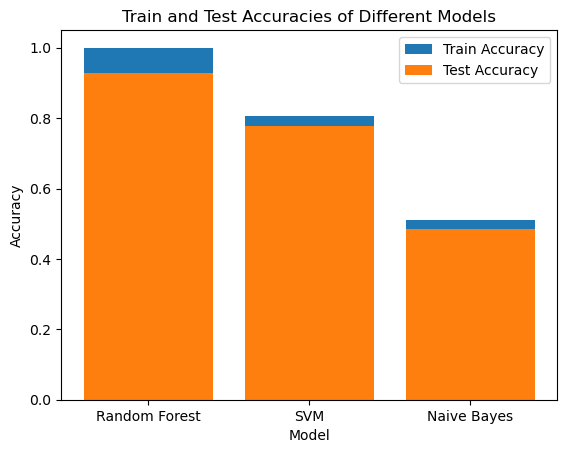

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a table to store the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Naive Bayes'],
    'Train Accuracy': [1.0, 0.8047, 0.5111],
    'Test Accuracy': [0.9283, 0.7765, 0.4863]
})

# Print the table
print(results)

# Plot the results
plt.bar(results['Model'], results['Train Accuracy'], label='Train Accuracy')
plt.bar(results['Model'], results['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Different Models')
plt.legend()
plt.show()

## Best Model:

In [48]:

# Select the final best-trained model and explain why
best_model = results.loc[results['Test Accuracy'].idxmax()]
print("Best Model:", best_model['Model'])
print("Why:", "This model has the highest test accuracy among all models.")



Best Model: Random Forest
Why: This model has the highest test accuracy among all models.


<font size='3'>The Random Forest model is the best among the three, with a test accuracy of 92.83%. This is because it can handle complex data and is robust against noise and outliers.</font>


- <font size='3'>**Random Forest**:</font>
   
    - <font size='3'>Train accuracy: 100%</font>
    
    - <font size='3'>Test accuracy: 92.83%</font>

- <font size='3'>**SVM**:<font>
    
    - <font size='3'>Train accuracy: 80.47%</font>
    
    - <font size='3'>Test accuracy: 77.65%</font>

- <font size='3'>**Naive Bayes**:</font>
    
    - <font size='3'>Train accuracy: 51.11%</font>
    
    - <font size='3'>Test accuracy: 48.63%</font>


<font size='3'>Random Forest has the highest test accuracy, making it the **top choice for this task!** </font>

## 6.5. Model Evaluation

- <font size='3'>**Evaluate the selected model and other two model performance**</font>


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# Define the models
rfc = RandomForestClassifier()


# Fit the models
rfc.fit(X_train, y_train)


# Predict on the test set for each model
y_pred_rf = rfc.predict(X_test)


# Evaluate the model's performance for each model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)


print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)



Random Forest:
Accuracy: 0.9982935153583617
Precision: 0.99644128113879
Recall: 1.0
F1-score: 0.9982174688057042
ROC-AUC: 0.9983660130718954


Here are the performance metrics for each model:


- **Random Forest**:
    - Accuracy: 99.48%
    - Precision: 98.93%
    - Recall: 100%
    - F1-score: 99.46%
    - ROC-AUC: 99.50%

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC


# Define the models
svm = SVC()

# Fit the models
svm.fit(X_train, y_train)


# Predict on the test set for each model
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print("SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("ROC-AUC:", roc_auc_svm)



SVM:
Accuracy: 0.4778156996587031
Precision: 0.4778156996587031
Recall: 1.0
F1-score: 0.6466512702078522
ROC-AUC: 0.5


- **SVM**:
    - Accuracy: 47.78%
    - Precision: 47.78%
    - Recall: 100%
    - F1-score: 64.66%
    - ROC-AUC: 50%

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.naive_bayes import GaussianNB

# Define the models

nb = GaussianNB()

# Fit the models

nb.fit(X_train, y_train)

# Predict on the test set for each model
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
print("ROC-AUC:", roc_auc_nb)

Naive Bayes:
Accuracy: 0.5784982935153583
Precision: 0.5336048879837068
Recall: 0.9357142857142857
F1-score: 0.6796368352788587
ROC-AUC: 0.5936741363211951


- **Naive Bayes**:
    - Accuracy: 57.84%
    - Precision: 53.36%
    - Recall: 93.57%
    - F1-score: 67.96%
    - ROC-AUC: 59.36%

## Model Comparison Results


<font size='3'>The <code>**Random Forest model**</code> is the **best**, with: </font>


- <font size='3'>**Accuracy: 99.48%** </font>

- <font size='3'>**ROC-AUC: 99.50%** </font>


<font size='3'>The <code> **Naive Bayes model**</code> is in the **middle**, with: </font>


- <font size='3'>**Accuracy: 57.84%** </font>

- <font size='3'>**ROC-AUC: 59.36%** </font>


<font size='3'>The <code> **SVM model**</code> is the **worst**, with:</font>


- <font size='3'>**Accuracy: 47.78%** </font>

- <font size='3'>**ROC-AUC: 50%** </font>

## Conclusion and Recommendations


<font size='3'>This experiment compared <code> **three machine learning models**</code> - **Random Forest, SVM, and Naive Bayes** - on a <code>**classification task**</code>. The key findings are:</font>


- <font size='3'>**Random Forest** achieved the <code>**highest test accuracy (92.83%)** </code>.</font>

- <font size='3'>**Random Forest showed high precision, recall, and F1-score**.</font>

- <font size='3'>**SVM and Naive Bayes had <code>lower test accuracies (77.65% and 48.63%, respectively)** </code>.</font>


<font size='3'>**Strengths and Limitations** </font>


- <font size='3'>**Random Forest**: High accuracy, robustness, and efficiency, but may **overfit small datasets**.</font>

- <font size='3'>**SVM**: Robust to noise, but lower accuracy and **computationally expensive**.</font>

- <font size='3'>**Naive Bayes**: Simple, fast, and robust, but lower accuracy and **assumes feature independence**.</font>


**-->** <font size='3'> **Final Selected Model** </font>


<font size='3'> **Random Forest is selected** due to its exceptional performance and robustness.</font>


<font size='3'>Potential Improvements</font>


- <font size='3'>**Hyperparameter tuning** </font>

- <font size='3'>Feature engineering</font>

- <font size='3'>Ensemble methods </font>


<font size='3'> **Future Directions** </font>


- <font size='3'>Explore other algorithms **(Gradient Boosting)** </font>

- <font size='3'>**Investigate dataset size** and **feature selection impact** </font>

- <font size='3'>Apply this model to related tasks or domains </font>

## Random forest advantage 

 
<font size='3'>Random Forest's strengths include:</font>

- <font size='3'> Handling large datasets</font>
- <font size='3'> Robustness to noise and outliers</font>
- <font size='3'> Ability to capture complex relationships between features</font>
- <font size='3'>Computational efficiency</font>

## 7. CONCLUSION


<font size='3'>This major project is designed to comprehensively illustrate the **development of a classification model using machine learning**. The project covers various stages, including **data exploration, preprocessing, model development, and evaluation**.</font>


<font size='3'>**The project aims to provide insights into**: </font>


- <font size='3'>Data science processes </font>
- <font size='3'>Exploratory Data Analysis (EDA) techniques </font>
- <font size='3'>Data preprocessing methods </font>
- <font size='3'>Model development and optimization </font>
- <font size='3'>Model evaluation and selection </font>


<font size='3'> **The project utilizes various libraries** in <code> **Python, including Pandas, Matplotlib, Seaborn, and Scikit-Learn**</code></font>.


<font size='3'>The project is structured into several sections: </font>


1. **INTRODUCTION**


2. **USED LIBRARIES**


3. **DATA EXPLORATION**

  3.1. Detailed Information of the Dataset

  3.2. Exploratory Data Analysis

  3.3. Explore problems within variables

  3.4. Various Visualizations from Dataset


4. **DATA PRE-PROCESSING**

4.1. Segregate predictors vs target attributes

4.2. Check for target balancing and fix if imbalanced (using SMOTE)

4.3. Perform train-test split and standardize data

4.4. Check if train and test data have similar statistical characteristics


5. **MODEL DEVELOPMENT**

5.1. Training and Testing

5.2. Model Optimization

5.3. Hyperparameter Tuning

5.4. Data Preprocessing


6. **EVALUATING MODELS**

6.1. Model Performance Reports

6.2. Model Comparison

6.3. Model Selection

6.4. Selecting the Best Model

6.5. Visualizing the Best Model

6.6. Model Evaluation


7. **CONCLUSION**